In [1]:
#Dependencies and setup
import pandas as pd
from pathlib import Path
from datetime import date
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Setting up the Work From Home data set

#Loading the Work From Home data
wfh_data = Path("resources/WFH_Share.csv")

#Read and store into DataFrame
wfh_df = pd.read_csv(wfh_data)

#Clean up the columns
wfh_df = wfh_df[["date","WFH_share"]]
wfh_df.dropna()

#Change date column data type 
wfh_df["date"]=pd.to_datetime(wfh_df["date"])

#Eliminate dates under 2018
wfh_df = wfh_df[(wfh_df["date"] > "2018-01-01")]
wfh_df = wfh_df[(wfh_df["date"] < "2022-01-01")]

wfh_df.head()


,date,WFH_share
27,2019-01-01,7.2
28,2020-05-01,61.5
29,2020-07-01,51.0
30,2020-08-01,48.3
31,2020-09-01,44.3


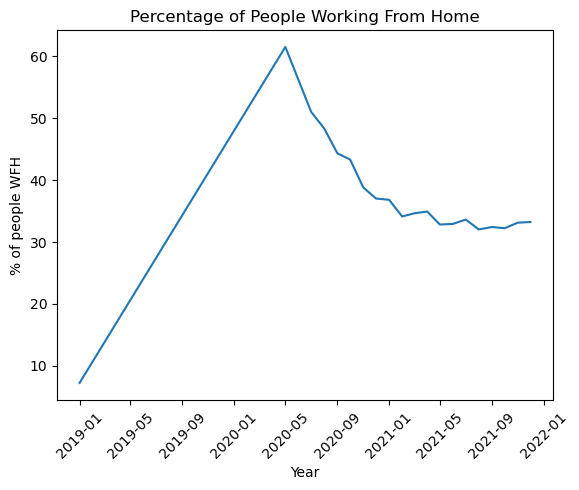

In [3]:
#Creating an analyzation of the work from home data set

wfh_time = wfh_df["date"]
wfh_prct = wfh_df["WFH_share"]

plt.plot(wfh_time, wfh_prct)
plt.title("Percentage of People Working From Home")
plt.xlabel("Year")
plt.ylabel("% of people WFH")

plt.xticks(rotation=45)


#plt.plot(["2020-01", "2020-01"], [0, 65], color='k', linestyle='-', linewidth=2)
plt.show()

In [23]:
#Setting up the Fixed Rate Mortgate Rates

#Loading the Work From Home data
frm_data = Path("resources/historicalweeklydata.csv")

#Read and store into DataFrame
frm_df = pd.read_csv(frm_data)

#Clean up the DataFram
frm_df.columns = frm_df.iloc[0]
frm_df=frm_df.drop(frm_df.index[0])
frm_df = frm_df[["Week","US 30 Yr FRM"]]
frm_df.dropna()

#Change date column data type 
frm_df["Week"]=pd.to_datetime(frm_df["Week"])

frm_df["US 30 Yr FRM"]=pd.to_numeric(frm_df["US 30 Yr FRM"])

#Eliminate dates under 2018
frm_df = frm_df[(frm_df["Week"] > "2018-01-01")]
frm_df = frm_df[(frm_df["Week"] < "2022-01-01")]

frm_df.head()

/var/folders/wn/pvxtrhh56gnf0b4dq9xmfd8h0000gn/T/ipykernel_39682/2696787800.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  frm_df["Week"]=pd.to_datetime(frm_df["Week"])


,Week,US 30 Yr FRM
2441,2018-01-04,3.95
2442,2018-01-11,3.99
2443,2018-01-18,4.04
2444,2018-01-25,4.15
2445,2018-02-01,4.22


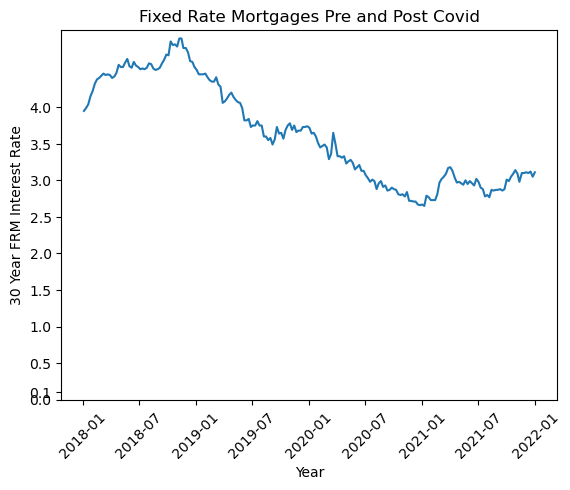

In [39]:
#Creating a data visualization to show how mortgage interest rates were affected through 2018-22.

rate_time = frm_df["Week"]
rate_mortgage = frm_df["US 30 Yr FRM"]

plt.plot(rate_time, rate_mortgage)

plt.title("Fixed Rate Mortgages Pre and Post Covid")
plt.xlabel("Year")
plt.ylabel("30 Year FRM Interest Rate")

#plt.xticks(x, labels=labels)

plt.xticks(rotation=45)
plt.yticks([0, 0.1, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4])

plt.show()

In [18]:
#Reading in Average Wage data

#Loading the Average Wage data
aw_data = Path("resources/AverageWage.csv")

#Read and store into DataFrame
aw_df = pd.read_csv(aw_data)

aw_df.head()


,Year,AWI,Increase,Prior Year Avg Amt,Avg Amt,Number of Workers,Aggregate wages
0,1985,16822.51,0.0426,"$15,250.75","15,900.51","114,922","1,827,321"
1,1986,17321.82,0.0297,"15,900.51","16,372.45","115,135","1,885,046"
2,1987,18426.51,0.0638,"16,372.45","17,416.59","119,557","2,082,269"
3,1988,19334.04,0.0493,"17,416.59","18,274.38","122,797","2,244,036"
4,1989,20099.55,0.0396,"18,274.38","18,997.93","126,909","2,411,003"


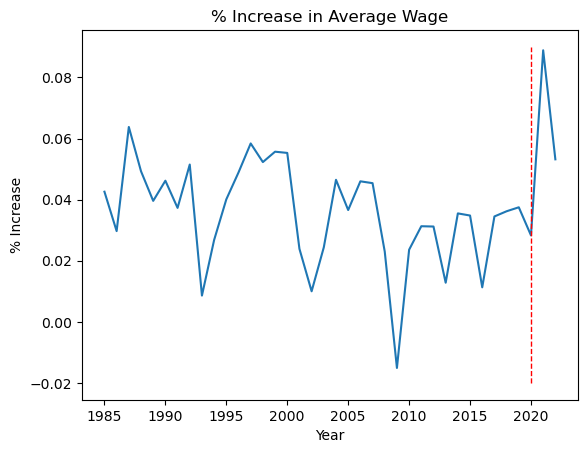

In [33]:
aw_year = aw_df["Year"]
aw_wage = aw_df["Increase"]

plt.plot(aw_year, aw_wage)
plt.plot([2020, 2020], [-0.02, 0.09], color='r', linestyle="dashed", linewidth=1)
plt.title("% Increase in Average Wage")
plt.xlabel("Year")
plt.ylabel("% Increase")
plt.show()